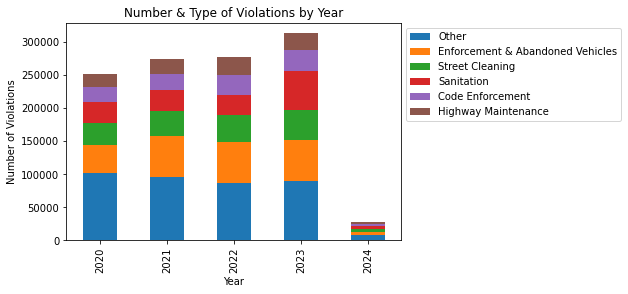

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pandas as pd

# Combine and isolate the vilations and the date they were issued from 5 datasets
df20 = pd.read_csv('./data/311Service2020.csv')
df21 = pd.read_csv('./data/311Service2021.csv')
df22 = pd.read_csv('./data/311Service2022.csv')
df23 = pd.read_csv('./data/311Service2023.csv')
df24 = pd.read_csv('./data/311Service2024.csv')
df = pd.concat([df20, df21, df22, df23, df24], ignore_index=True)
df.dropna(subset=['reason', 'open_dt'], inplace=True)
df['open_dt'] = df.loc[:,'open_dt'].str.slice(0,4)
df1 = df[['open_dt', 'reason']]
df2 = df[['open_dt', 'type']]
# Group the violations that have a total sum of occurances below the threshold into an other category
# Might want to increase specificity for violations and location if needed
threshold = 70000
result = df1.groupby('open_dt')['reason'].value_counts().unstack(fill_value=0)
other_reasons = result.columns[result.sum(axis=0) < threshold]
result['Other'] = result[other_reasons].sum(axis=1)
result.drop(other_reasons, axis=1, inplace=True)
# Sort the violations by descending order
result = result[result.sum().sort_values(ascending=False).index]
# Plot using a stacked bar graph
result.plot(kind='bar', stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.ylabel('Number of Violations')
plt.title('Number & Type of Violations by Year')
plt.show()